# OMAD 20/10/2022

Episode 1: Fair's Extramarital Affairs Data

In [51]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import math

In [63]:
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/AER/Affairs.csv", index_col = 0)
data = data.sort_index()
data.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
4,0,male,37.0,10.0,no,3,18,7,4
5,0,female,27.0,4.0,no,4,14,6,4
6,3,male,27.0,1.5,no,3,18,4,4
11,0,female,32.0,15.0,yes,1,12,1,4
12,3,female,27.0,4.0,yes,3,17,1,5


In [64]:
data.affairs.unique()

array([ 0,  3,  7, 12,  1,  2], dtype=int64)

In [54]:
def increase_count(df, num_desired: int):

    x = len(df)

    if x == 0:

        return df

    mul = math.floor(num_desired / x)

    return pd.concat([df] * mul, ignore_index = True)

In [65]:
[i for i in data.affairs.unique() if i != 0]

[3, 7, 12, 1, 2]

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating


plot the data to get an idea of what it looks like

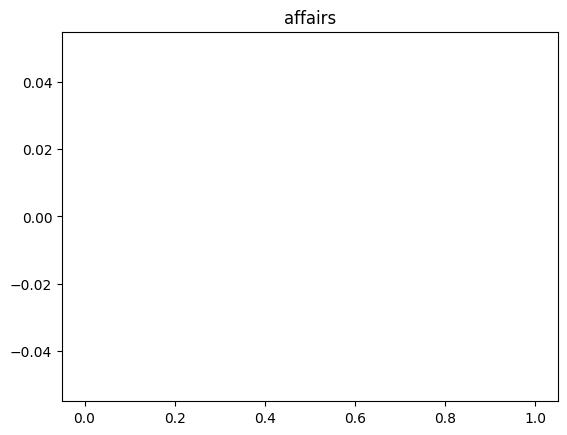

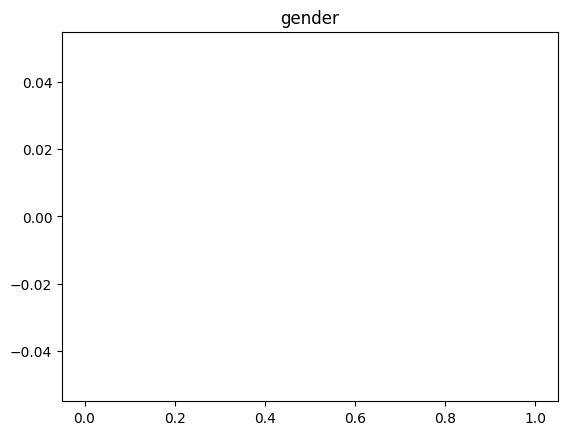

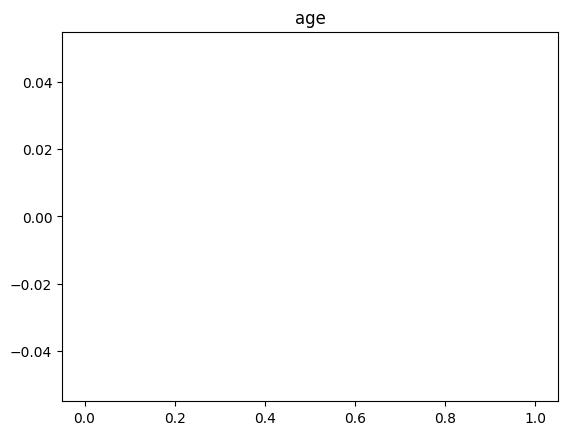

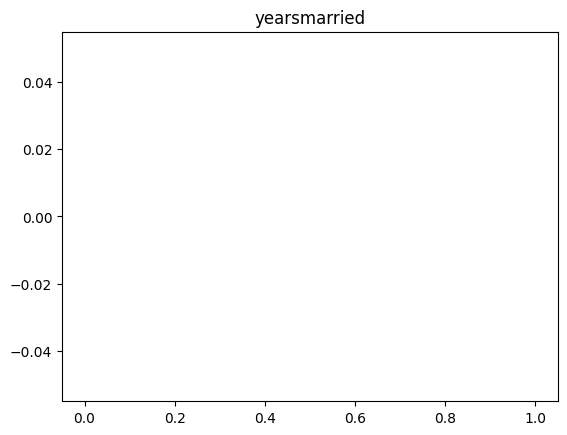

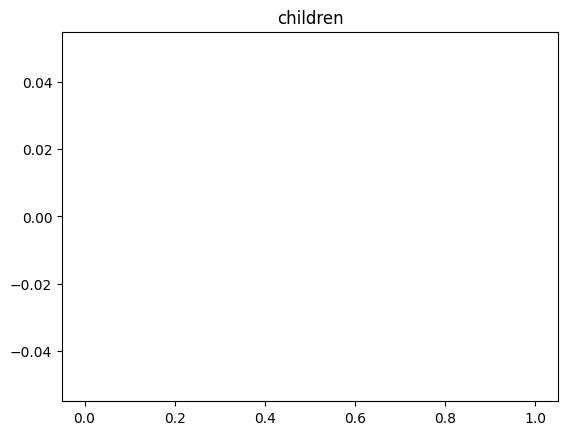

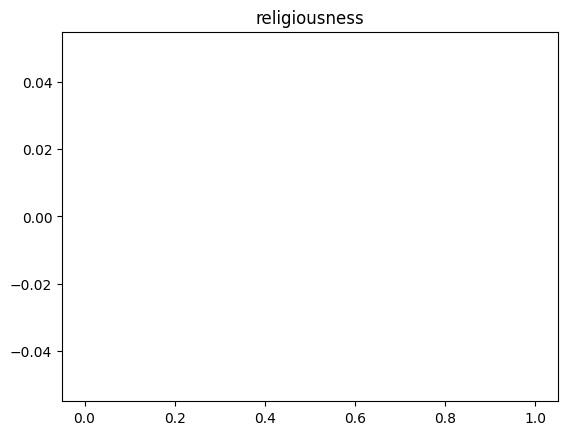

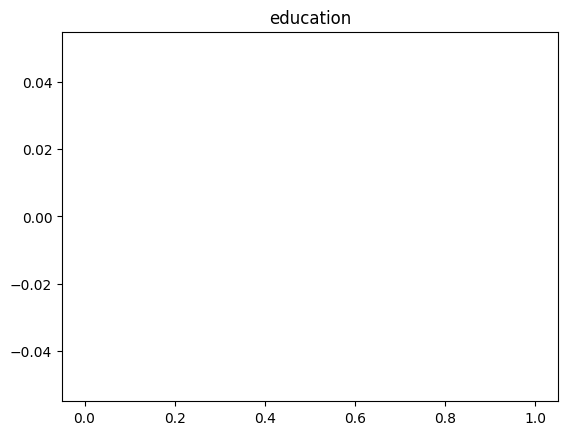

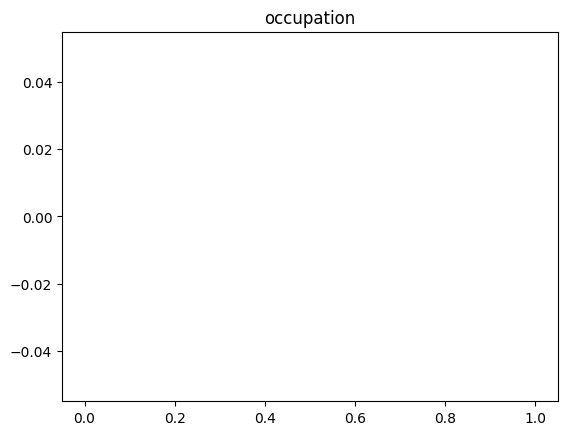

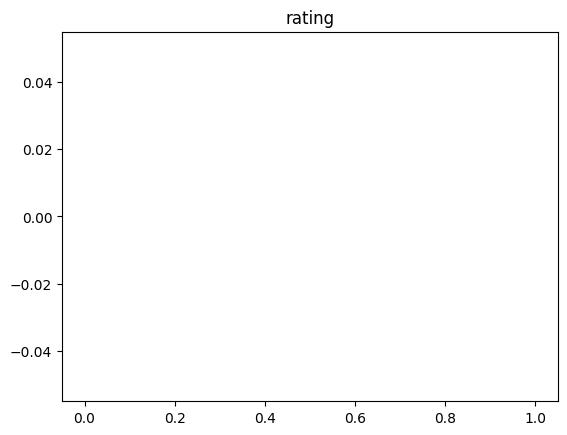

In [56]:
for item in data:
    plt.figure()
    plt.hist(data[item])
    plt.title(item)
    plt.show()

We need to replace the strings with categorical data. This will be applied to the gender and the binary "children" factor.

In [57]:
data["gender"] = (data.gender == "male").astype(int)

data["children"] = (data.children == "yes").astype(int)

In [58]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[1:]], data[data.columns[0]], test_size=0.33, random_state=0)

ValueError: With n_samples=0, test_size=0.33 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.